<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-Datasets" data-toc-modified-id="Preparing-Datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparing Datasets</a></span><ul class="toc-item"><li><span><a href="#Material-footprint-per-capita" data-toc-modified-id="Material-footprint-per-capita-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Material footprint per capita</a></span></li><li><span><a href="#CO2-emission-per-capita" data-toc-modified-id="CO2-emission-per-capita-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>CO2 emission per capita</a></span></li><li><span><a href="#Human-development-index" data-toc-modified-id="Human-development-index-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Human development index</a></span></li><li><span><a href="#The-final-dataset" data-toc-modified-id="The-final-dataset-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>The final dataset</a></span></li></ul></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#HDI-in-2017" data-toc-modified-id="HDI-in-2017-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>HDI in 2017</a></span></li><li><span><a href="#HDI-trend-from-1998-to-2017" data-toc-modified-id="HDI-trend-from-1998-to-2017-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>HDI trend from 1998 to 2017</a></span></li><li><span><a href="#Median-of-CO2-emission-per-capita-and-material-footprint-per-capita-trends" data-toc-modified-id="Median-of-CO2-emission-per-capita-and-material-footprint-per-capita-trends-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Median of CO2 emission per capita and material footprint per capita trends</a></span></li><li><span><a href="#Human-development-index(HDI),-planet-pressure-adjusted-HDI(PHDI),-and-adjustment-index" data-toc-modified-id="Human-development-index(HDI),-planet-pressure-adjusted-HDI(PHDI),-and-adjustment-index-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Human development index(HDI), planet-pressure adjusted HDI(PHDI), and adjustment index</a></span></li><li><span><a href="#HDI-v.s.-PHDI-in-2017-by-Human-Development-Level" data-toc-modified-id="HDI-v.s.-PHDI-in-2017-by-Human-Development-Level-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>HDI v.s. PHDI in 2017 by Human Development Level</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Preparing Datasets

### Material footprint per capita 

In [2]:
# Load original dataset which record the four types of material footprint separately
mfpc = pd.read_csv('Material_footprint_per_capita.csv', skiprows=3, usecols=['COUNTRY NAME','YEAR','VALUE'])

In [3]:
# Select the last 20 years data, i.e., from 1998 to 2017
mfpc = mfpc[mfpc.YEAR > 1997]

In [4]:
mfpc.head()

,COUNTRY NAME,YEAR,VALUE
32,Afghanistan,1998,0.78
33,Afghanistan,1998,0.03
34,Afghanistan,1998,0.02
35,Afghanistan,1998,0.13
36,Afghanistan,1999,0.67


In [5]:
mfpc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13759 entries, 32 to 19262
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COUNTRY NAME  13759 non-null  object 
 1   YEAR          13759 non-null  int64  
 2   VALUE         13759 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 430.0+ KB


In [6]:
# Sum all the material footprints 
df_mfpc = mfpc.groupby(by=['COUNTRY NAME', 'YEAR']).sum().reset_index()
df_mfpc.head()

,COUNTRY NAME,YEAR,VALUE
0,Afghanistan,1998,0.96
1,Afghanistan,1999,0.85
2,Afghanistan,2000,0.60
3,Afghanistan,2001,0.88
4,Afghanistan,2002,0.95


In [7]:
# Find out the max value
df_mfpc.iloc[df_mfpc.VALUE.idxmax(),:]

COUNTRY NAME    Guyana
YEAR              2000
VALUE           152.58
Name: 1322, dtype: object

In [8]:
# Define material footprint per capita index
mfpc_max = np.max(df_mfpc.VALUE)
df_mfpc['mfpc_index'] = (mfpc_max - df_mfpc.VALUE) / (mfpc_max)

In [9]:
df_mfpc.rename(mapper={'COUNTRY NAME': 'country','YEAR': 'year', 'VALUE':'material_footprint_per_capita'}, axis=1, inplace=True)
df_mfpc

,country,year,material_footprint_per_capita,mfpc_index
0,Afghanistan,1998,0.96,0.993708
1,Afghanistan,1999,0.85,0.994429
2,Afghanistan,2000,0.60,0.996068
3,Afghanistan,2001,0.88,0.994233
4,Afghanistan,2002,0.95,0.993774
...,...,...,...,...
3435,Zimbabwe,2013,3.30,0.978372
3436,Zimbabwe,2014,3.55,0.976734
3437,Zimbabwe,2015,3.38,0.977848
3438,Zimbabwe,2016,3.30,0.978372


### CO2 emission per capita

In [10]:
co2pc = pd.read_excel('owid-co2-data.xlsx', usecols=['country','year','co2_per_capita'])
df_co2pc = co2pc[(co2pc.year >= 1998) & (co2pc.year <= 2017)].reset_index(drop=True)
df_co2pc

,country,year,co2_per_capita
0,Afghanistan,1998,0.052
1,Afghanistan,1999,0.040
2,Afghanistan,2000,0.036
3,Afghanistan,2001,0.037
4,Afghanistan,2002,0.047
...,...,...,...
4516,Zimbabwe,2013,0.870
4517,Zimbabwe,2014,0.881
4518,Zimbabwe,2015,0.881
4519,Zimbabwe,2016,0.771


In [11]:
df_co2pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         4521 non-null   object 
 1   year            4521 non-null   int64  
 2   co2_per_capita  4396 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 106.1+ KB


In [12]:
# Find out the max value
df_co2pc.iloc[df_co2pc.co2_per_capita.idxmax(),:]

country            Qatar
year                2001
co2_per_capita    67.015
Name: 3311, dtype: object

In [13]:
# Define the co2 emission per capita index
co2pc_max = np.max(df_co2pc.co2_per_capita)
df_co2pc.loc[:,'co2pc_index'] = (co2pc_max - df_co2pc['co2_per_capita']) / co2pc_max
df_co2pc.head()

,country,year,co2_per_capita,co2pc_index
0,Afghanistan,1998,0.052,0.999224
1,Afghanistan,1999,0.040,0.999403
2,Afghanistan,2000,0.036,0.999463
3,Afghanistan,2001,0.037,0.999448
4,Afghanistan,2002,0.047,0.999299


### Human development index

In [14]:
hdi = pd.read_csv('Human Development Index.csv', na_values='..')

hdi.dropna(axis=1, how='all',inplace=True)
hdi

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,...,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
1,69,Albania,0.650,0.631,0.615,0.618,0.624,0.637,0.646,0.645,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
2,91,Algeria,0.572,0.576,0.582,0.586,0.590,0.595,0.602,0.611,...,0.721,0.728,0.728,0.729,0.736,0.740,0.743,0.745,0.746,0.748
3,36,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,,Least Developed Countries,0.350,0.353,0.354,0.358,0.358,0.366,0.374,0.381,...,0.485,0.493,0.499,0.504,0.510,0.516,0.520,0.525,0.528,0.538
203,,Small Island Developing States,0.595,0.598,0.603,0.608,0.612,0.618,0.624,0.629,...,0.702,0.706,0.704,0.708,0.712,0.717,0.719,0.722,0.723,0.728
204,,Organization for Economic Co-operation and Dev...,0.785,0.790,0.788,0.800,0.807,0.812,0.817,0.817,...,0.873,0.877,0.879,0.883,0.886,0.889,0.892,0.894,0.895,0.900
205,,World,0.598,0.601,0.601,0.608,0.611,0.617,0.622,0.624,...,0.697,0.703,0.708,0.713,0.718,0.722,0.727,0.729,0.731,0.737


In [15]:
hdi = hdi.drop(hdi.loc[:, '1990':'1997'].columns, axis=1).iloc[:189, 1:22]

df_hdi = pd.melt(hdi, id_vars=['Country']).sort_values(by=['Country','variable']).reset_index(drop=True)

df_hdi.rename(mapper={'Country':'country', 'variable':'year', 'value':'hdi'}, axis=1, inplace=True)
df_hdi

,country,year,hdi
0,Afghanistan,1998,0.344
1,Afghanistan,1999,0.348
2,Afghanistan,2000,0.350
3,Afghanistan,2001,0.353
4,Afghanistan,2002,0.384
...,...,...,...
3775,Zimbabwe,2013,0.537
3776,Zimbabwe,2014,0.547
3777,Zimbabwe,2015,0.553
3778,Zimbabwe,2016,0.558


In [16]:
# Country name issue
str(df_hdi.iloc[0, 0])

' Afghanistan'

In [17]:
df_hdi.iloc[:, 0] = df_hdi.iloc[:, 0].apply(lambda x: x.strip(' '))
str(df_hdi.iloc[0, 0])

'Afghanistan'

In [18]:
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  3780 non-null   object 
 1   year     3780 non-null   object 
 2   hdi      3610 non-null   float64
dtypes: float64(1), object(2)
memory usage: 88.7+ KB


In [19]:
df_hdi = df_hdi.astype({'year':'int'})
df_hdi.year.dtype

dtype('int64')

### The final dataset

In [20]:
df = df_hdi.merge(df_mfpc, how='inner', on=['country', 'year']).merge(df_co2pc, how='inner', on=['country', 'year'])

In [21]:
df.head()

,country,year,hdi,material_footprint_per_capita,mfpc_index,co2_per_capita,co2pc_index
0,Afghanistan,1998,0.344,0.96,0.993708,0.052,0.999224
1,Afghanistan,1999,0.348,0.85,0.994429,0.040,0.999403
2,Afghanistan,2000,0.350,0.60,0.996068,0.036,0.999463
3,Afghanistan,2001,0.353,0.88,0.994233,0.037,0.999448
4,Afghanistan,2002,0.384,0.95,0.993774,0.047,0.999299


In [22]:
# Define adjustment index and planetary-pressure adjustmented human development index
df.loc[:, 'adjustment_index'] = (df.mfpc_index + df.co2pc_index) / 2
df.loc[:, 'phdi'] = (df.adjustment_index * df.hdi)
df

,country,year,hdi,material_footprint_per_capita,mfpc_index,co2_per_capita,co2pc_index,adjustment_index,phdi
0,Afghanistan,1998,0.344,0.96,0.993708,0.052,0.999224,0.996466,0.342784
1,Afghanistan,1999,0.348,0.85,0.994429,0.040,0.999403,0.996916,0.346927
2,Afghanistan,2000,0.350,0.60,0.996068,0.036,0.999463,0.997765,0.349218
3,Afghanistan,2001,0.353,0.88,0.994233,0.037,0.999448,0.996840,0.351885
4,Afghanistan,2002,0.384,0.95,0.993774,0.047,0.999299,0.996536,0.382670
...,...,...,...,...,...,...,...,...,...
3055,Zimbabwe,2013,0.537,3.30,0.978372,0.870,0.987018,0.982695,0.527707
3056,Zimbabwe,2014,0.547,3.55,0.976734,0.881,0.986854,0.981794,0.537041
3057,Zimbabwe,2015,0.553,3.38,0.977848,0.881,0.986854,0.982351,0.543240
3058,Zimbabwe,2016,0.558,3.30,0.978372,0.771,0.988495,0.983434,0.548756


In [23]:
# Define human development level
hdi_level = []
for x in df.hdi:
    if x >= 0.8:
        hdi_level.append('Very High')
    elif x >= 0.7:
        hdi_level.append('High')
    elif x >= 0.55:
        hdi_level.append('Medium')
    else:
        hdi_level.append('Low')
df.loc[:, 'hdi_level'] = hdi_level
df.head()

,country,year,hdi,material_footprint_per_capita,mfpc_index,co2_per_capita,co2pc_index,adjustment_index,phdi,hdi_level
0,Afghanistan,1998,0.344,0.96,0.993708,0.052,0.999224,0.996466,0.342784,Low
1,Afghanistan,1999,0.348,0.85,0.994429,0.040,0.999403,0.996916,0.346927,Low
2,Afghanistan,2000,0.350,0.60,0.996068,0.036,0.999463,0.997765,0.349218,Low
3,Afghanistan,2001,0.353,0.88,0.994233,0.037,0.999448,0.996840,0.351885,Low
4,Afghanistan,2002,0.384,0.95,0.993774,0.047,0.999299,0.996536,0.382670,Low


## Data Analysis

### HDI in 2017

In [24]:
df_2017 = df[df.year == 2017].reset_index()
df_2017.head()

,index,country,year,hdi,material_footprint_per_capita,mfpc_index,co2_per_capita,co2pc_index,adjustment_index,phdi,hdi_level
0,19,Afghanistan,2017,0.506,1.22,0.992004,0.189,0.997180,0.994592,0.503264,Low
1,39,Albania,2017,0.790,11.38,0.925416,1.874,0.972036,0.948726,0.749494,High
2,59,Algeria,2017,0.745,3.09,0.979748,3.707,0.944684,0.962216,0.716851,High
3,79,Angola,2017,0.582,3.35,0.978044,1.257,0.981243,0.979644,0.570153,Medium
4,99,Antigua and Barbuda,2017,0.768,12.54,0.917814,5.168,0.922883,0.920348,0.706827,High


In [25]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          153 non-null    int64  
 1   country                        153 non-null    object 
 2   year                           153 non-null    int64  
 3   hdi                            153 non-null    float64
 4   material_footprint_per_capita  153 non-null    float64
 5   mfpc_index                     153 non-null    float64
 6   co2_per_capita                 153 non-null    float64
 7   co2pc_index                    153 non-null    float64
 8   adjustment_index               153 non-null    float64
 9   phdi                           153 non-null    float64
 10  hdi_level                      153 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 13.3+ KB


In [26]:
df_2017.describe()

,index,year,hdi,material_footprint_per_capita,mfpc_index,co2_per_capita,co2pc_index,adjustment_index,phdi
count,153.000000,153.0,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,1539.000000,2017.0,0.718784,14.532026,0.904758,4.619399,0.931069,0.917914,0.651162
std,886.227962,0.0,0.154479,16.591282,0.108738,5.800887,0.086561,0.082576,0.114285
min,19.000000,2017.0,0.386000,0.430000,0.226176,0.051000,0.421906,0.537497,0.381697
25%,779.000000,2017.0,0.588000,3.700000,0.858894,0.720000,0.904962,0.872749,0.567410
50%,1539.000000,2017.0,0.746000,9.120000,0.940228,2.669000,0.960173,0.950631,0.683659
75%,2299.000000,2017.0,0.845000,21.530000,0.975750,6.369000,0.989256,0.979756,0.739078
max,3059.000000,2017.0,0.954000,118.070000,0.997182,38.741000,0.999239,0.996446,0.822534


In [27]:
df_2017.groupby(by='hdi_level').count().country.sort_values(ascending=False)

hdi_level
Very High    54
High         41
Low          30
Medium       28
Name: country, dtype: int64

<div class="burk">
**Q: Add legend to sns plot**</div><i class="fa fa-lightbulb-o "></i>

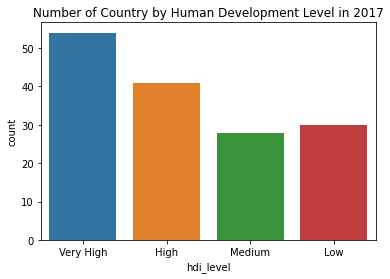

In [28]:
order=['Very High', 'High','Medium', 'Low']
sns.countplot(x='hdi_level', data=df_2017, order=order) #label=?
#plt.legend(['HDI >= 0.80','HDI >= 0.70', '0.70> HDI >= 0.55', 'HDI < 0.55'])
_ = plt.title('Number of Country by Human Development Level in 2017')

Very-high-development countries and high-development countries accounted for 60% of 153 countries worldwide in 2017.

### HDI trend from 1998 to 2017

In [29]:
# Counting the coutries by HDI level and year
df_hdi_level = df.groupby(['hdi_level', 'year']).count().country.reset_index()
df_hdi_level

,hdi_level,year,country
0,High,1998,28
1,High,1999,28
2,High,2000,29
3,High,2001,31
4,High,2002,30
...,...,...,...
75,Very High,2013,47
76,Very High,2014,48
77,Very High,2015,51
78,Very High,2016,54


In [30]:
# Calculating world average HDI value
hdi_world_year = df.groupby(['year']).mean().hdi.reset_index()

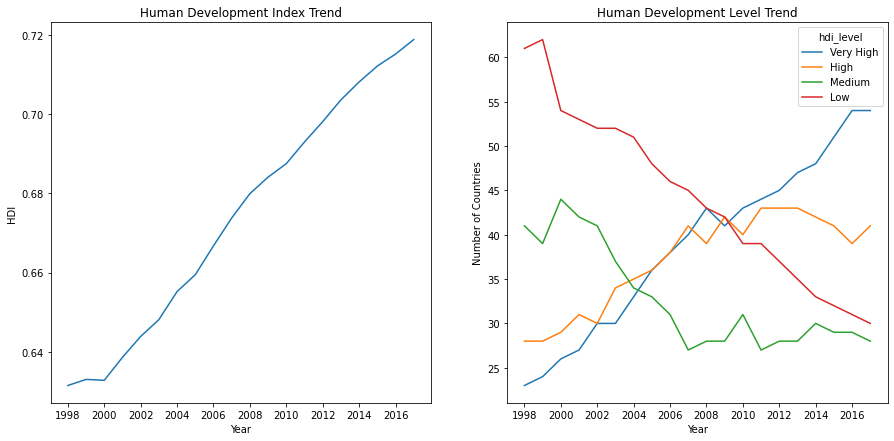

In [31]:
# Average HDI value trend
f, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.lineplot(x='year',y='hdi',data=hdi_world_year, ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('HDI')
axes[0].set_title('Human Development Index Trend')
axes[0].set_xticks(range(1998,2017,2))
# Number of countries by human development level over years
sns.lineplot(x='year',y='country',data=df_hdi_level, hue='hdi_level', hue_order=order, ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Countries')
axes[1].set_title('Human Development Level Trend')
_ = axes[1].set_xticks(range(1998,2017,2))

The trend of mean HDI shows that the human development of the whole world move to a better place. The number of the very-high-development and high-development countries increase over year, while the number of medium-development and low-development countries decrease. 

<div class="burk">
**Q: How to show the countries on a world map**</div><i class="fa fa-lightbulb-o "></i>

### Median of CO2 emission per capita and material footprint per capita trends

In [32]:
df_by_year = df.groupby(by=['year']).median().reset_index()

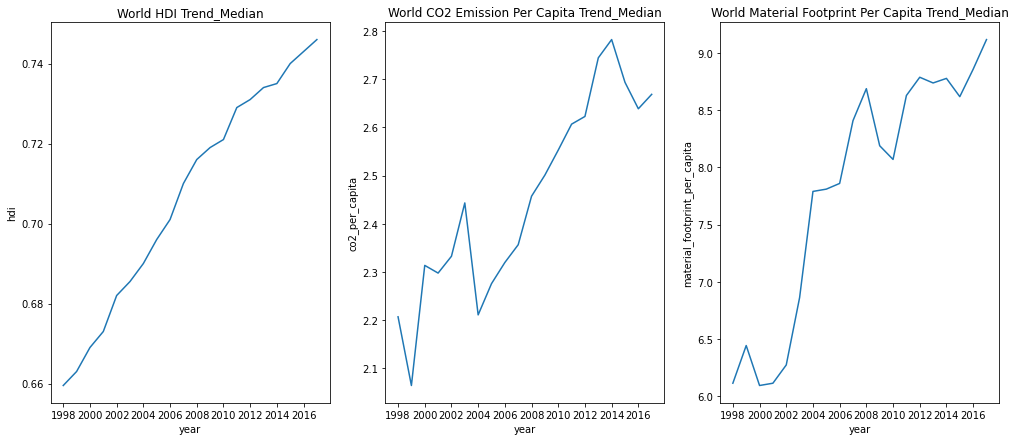

In [33]:
f, axes = plt.subplots(1, 3, figsize=(17, 7))
sns.lineplot(x='year',y='hdi',data=df_by_year, ax=axes[0])
axes[0].set_title('World HDI Trend_Median')
axes[0].set_xticks(range(1998,2017,2))
sns.lineplot(x='year',y='co2_per_capita',data=df_by_year, ax=axes[1])
axes[1].set_title('World CO2 Emission Per Capita Trend_Median')
axes[1].set_xticks(range(1998,2017,2))
sns.lineplot(x='year',y='material_footprint_per_capita',data=df_by_year, ax=axes[2])
axes[2].set_title('World Material Footprint Per Capita Trend_Median')
_ = axes[2].set_xticks(range(1998,2017,2))

The median of world CO2 emission per capita and material footprint per capita increased during the 20-years period, while the median of world HDI wend upward.

In [34]:
df_by_level_year = df.groupby(by=['hdi_level', 'year']).median().reset_index()
df_by_level_year

,hdi_level,year,hdi,material_footprint_per_capita,mfpc_index,co2_per_capita,co2pc_index,adjustment_index,phdi
0,High,1998,0.7555,14.230,0.906737,5.8820,0.912229,0.914480,0.674693
1,High,1999,0.7555,13.875,0.909064,5.8945,0.912042,0.909433,0.683929
2,High,2000,0.7570,13.300,0.912833,5.6650,0.915467,0.913354,0.686560
3,High,2001,0.7530,13.740,0.909949,6.1670,0.907976,0.918318,0.683494
4,High,2002,0.7460,12.710,0.916699,5.6060,0.916347,0.918611,0.687376
...,...,...,...,...,...,...,...,...,...
75,Very High,2013,0.8690,23.290,0.847359,7.6100,0.886443,0.862161,0.753768
76,Very High,2014,0.8745,23.495,0.846015,7.0195,0.895255,0.862769,0.761466
77,Very High,2015,0.8770,23.450,0.846310,7.0320,0.895068,0.861736,0.759870
78,Very High,2016,0.8710,23.795,0.844049,6.8370,0.897978,0.863575,0.761990


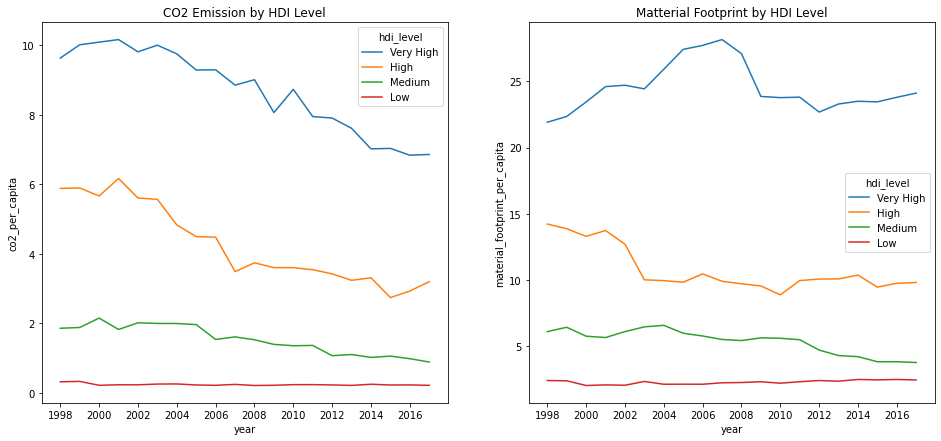

In [35]:
# CO2 emission and material footprint per capita by human development level
f, axes = plt.subplots(1,2,figsize=(16,7))
sns.lineplot(y='co2_per_capita', x='year',data=df_by_level_year, hue='hdi_level',hue_order=order, ax = axes[0])
axes[0].set_title('CO2 Emission by HDI Level')
axes[0].set_xticks(range(1998,2017,2))
sns.lineplot(y='material_footprint_per_capita', x='year',data=df_by_level_year, hue='hdi_level',hue_order=order,ax = axes[1])
axes[1].set_title('Matterial Footprint by HDI Level')
_ = axes[1].set_xticks(range(1998,2017,2))

The CO2 Emission and Material Footprint per capita are much higher in very-high-development countries than in medium-and-low-development countries.

### Human development index(HDI), planet-pressure adjusted HDI(PHDI), and adjustment index

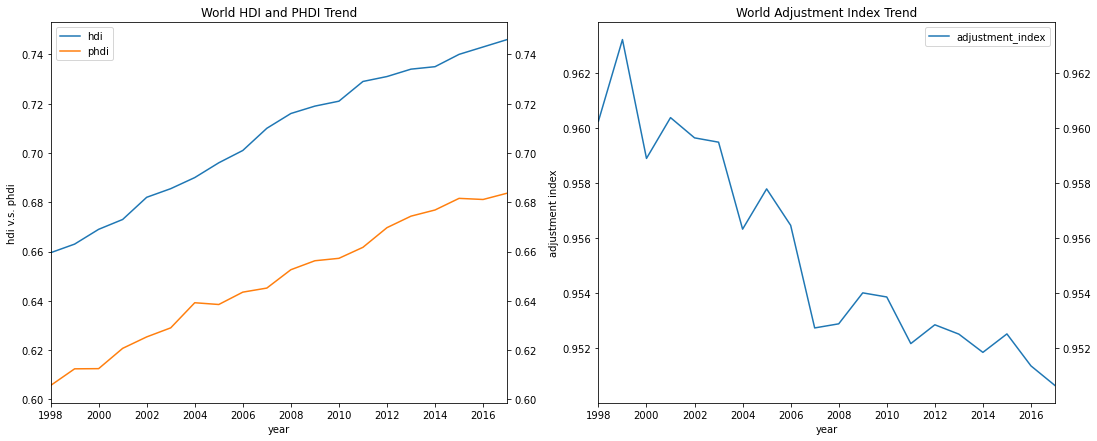

In [36]:
# World HDI, PHDI, adjustment index
f, axes = plt.subplots(1,2,figsize=(18,7))
df_by_year.plot(x='year',y=['hdi','phdi'], ax=axes[0])
axes[0].set_xticks(range(1998,2017,2))
axes[0].set_xlim(1998,2017)
axes[0].yaxis.set_ticks_position('both')
axes[0].tick_params(axis='y', which='both', labelleft='on', labelright='on')
axes[0].set_ylabel('hdi v.s. phdi')
axes[0].set_title('World HDI and PHDI Trend')
df_by_year.plot(x='year',y='adjustment_index', ax=axes[1])
axes[1].set_xticks(range(1998,2017,2))
axes[1].set_xlim(1998,2017)
axes[1].set_ylabel('adjustment index')
axes[1].set_title('World Adjustment Index Trend')
axes[1].yaxis.set_ticks_position('both')
_ = axes[1].tick_params(axis='y', which='both', labelleft='on', labelright='on')

The difference between HDI and PHDI increased in the 20-years period with the decreasing of the adjustment index, showing growing planet pressure.

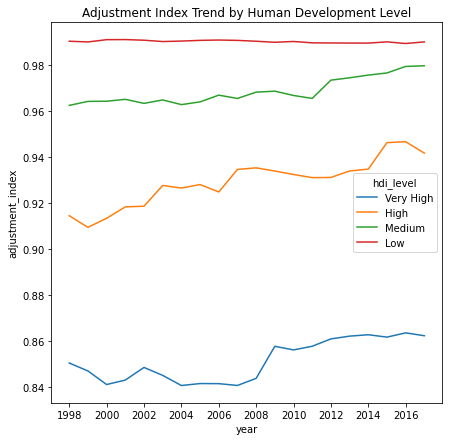

In [37]:
plt.subplots(figsize=(7,7))
sns.lineplot(x='year',y='adjustment_index', data=df_by_level_year, hue='hdi_level', hue_order=order)
plt.xticks(range(1998,2017,2))
_ = plt.title('Adjustment Index Trend by Human Development Level')

### HDI v.s. PHDI in 2017 by Human Development Level

In [38]:
df_2017.iloc[df_2017[df_2017.hdi_level=='Medium'].phdi.idxmin(),:].country

'Guyana'

In [39]:
df_2017.iloc[df_2017[df_2017.hdi_level=='High'].phdi.idxmin(),:].country

'Turkmenistan'

In [40]:
df_2017[df_2017.hdi_level=='Very High'].sort_values(by='phdi').country[:5]

83               Luxembourg
75                   Kuwait
116                   Qatar
146    United Arab Emirates
126               Singapore
Name: country, dtype: object

In [41]:
df_2017[df_2017.hdi_level=='Very High'].sort_values(by='phdi').country[-5:]

54         Germany
135         Sweden
136    Switzerland
39         Denmark
67         Ireland
Name: country, dtype: object

Text(0.76, 0.4, 'Luxembourg')

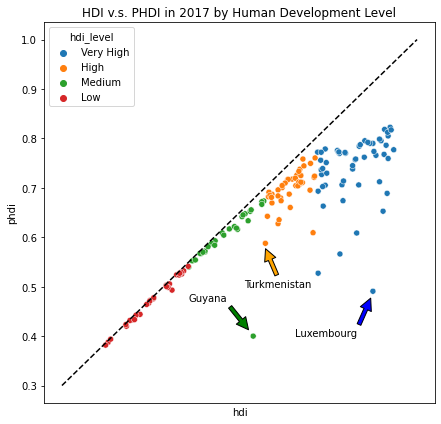

In [42]:
# HDI v.s. PHDI by development level
f, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x='hdi', y='phdi', data=df_2017,hue='hdi_level',hue_order=order)
plt.xticks(range(1998,2017,2))
plt.title('HDI v.s. PHDI in 2017 by Human Development Level')
_ = plt.plot([0.3, 1], [0.3, 1], ls="--", c='black')
ax.annotate('Guyana', xy=(0.67, 0.41), xytext=(0.55, 0.47),
            arrowprops=dict(facecolor='green', shrink=0.05))
ax.annotate('Turkmenistan', xy=(0.7, 0.58), xytext=(0.66, 0.50),
            arrowprops=dict(facecolor='orange', shrink=0.05))
ax.annotate('Luxembourg', xy=(0.91, 0.48), xytext=(0.76, 0.4),
            arrowprops=dict(facecolor='blue', shrink=0.05))